In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.api as sm
import itertools
import warnings
from pylab import rcParams


%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ed2637dd630949c89e9ef2e2a64cc11e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qkko9genTEYXGQWzZ20OMC5oN-VNBxEBa5RVdg3_oNLC',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='NYCdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_complaint = pd.read_csv(body)
df_complaint.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,"10,473.000",875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,BRONX,40.822,-73.873,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,"11,236.000",1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.644,-73.891,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,"10,033.000",129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.849,-73.936,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,"10,033.000",1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.849,-73.934,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,"11,237.000",296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.702,-73.919,NaN,RESIDENTIAL BUILDING,Open


In [3]:
# combine HEAT/HOT WATER complaint to HEATING complaint as after 2014 it is same

df_complaint['complaint_type'] = np.where(df_complaint['complaint_type']=='HEATING','HEAT/HOT WATER',df_complaint['complaint_type'])

In [4]:
df_complaint['complaint_type'].value_counts()

HEAT/HOT WATER            2154457
PLUMBING                   711588
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452572
PAINT - PLASTER            361257
PAINT/PLASTER              346770
ELECTRIC                   307552
NONCONST                   260890
DOOR/WINDOW                205640
WATER LEAK                 193978
GENERAL                    151596
FLOORING/STAIRS            137532
APPLIANCE                  113043
HPD Literature Request      52830
SAFETY                      51650
OUTSIDE BUILDING             7150
ELEVATOR                     6742
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

In [5]:

df_complaint.head(5)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,"10,473.000",875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,BRONX,40.822,-73.873,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,"11,236.000",1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.644,-73.891,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,"10,033.000",129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.849,-73.936,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,"10,033.000",1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.849,-73.934,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,"11,237.000",296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.702,-73.919,NaN,RESIDENTIAL BUILDING,Open


In [6]:
# change the 'created_date' object to datetime format
df_complaint['created_date'] =  pd.to_datetime(df_complaint['created_date'])

In [7]:
df_complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028330 entries, 0 to 6028329
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 689.9+ MB


In [30]:
# keep the column related to 'created_date' and their unique ID 'unique_key'. In my view, other features are not important as they are not 
# dependent on time

cols = ['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
        'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude', 'resolution_description', 
        'status','street_name']
df_complaint_ts = df_complaint.drop(cols, axis = 1)
df_complaint_ts.columns

Index(['created_date', 'unique_key'], dtype='object')


In [9]:
df_complaint_ts.head()

,created_date,unique_key
0,2020-02-11 16:30:41,45597712
1,2020-02-11 13:03:51,45595774
2,2020-02-11 05:14:53,45597773
3,2020-02-11 15:51:07,45597745
4,2020-02-11 10:14:47,45596755


In [10]:
df_complaint_ts['date'] = df_complaint_ts['created_date'].map(lambda x: x.strftime('%Y-%m'))

In [11]:
df_complaint_ts['created_year'] = df_complaint_ts['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

In [12]:
df_complaint_ts.head()

,created_date,unique_key,date,created_year
0,2020-02-11 16:30:41,45597712,2020-02,2020
1,2020-02-11 13:03:51,45595774,2020-02,2020
2,2020-02-11 05:14:53,45597773,2020-02,2020
3,2020-02-11 15:51:07,45597745,2020-02,2020
4,2020-02-11 10:14:47,45596755,2020-02,2020


In [13]:
# condition to remove year 2019 complaints from the dataset as it is incomplete yet
df_complaint_ts = df_complaint_ts[df_complaint_ts.created_year != 2019]
# keep the coloumn date in a fromat '%Y-%m'
df_complaint_ts = df_complaint_ts.drop(['created_date', 'created_year'], axis =1)
df_complaint_ts = df_complaint_ts.sort_values('date')
df_complaint_ts.head()


,unique_key,date
338003,15899042,2010-01
283487,15691332,2010-01
283488,15691333,2010-01
283489,15691334,2010-01
283490,15691335,2010-01


In [14]:
#  count the no of complaints 
df_complaint_ts = df_complaint_ts.groupby(['date']).count()['unique_key']

In [15]:
df_complaint_ts = pd.DataFrame(df_complaint_ts)
df_complaint_ts  = df_complaint_ts.rename(index=str, columns={"unique_key": "no_of_complaints"})

In [16]:
df_complaint_ts.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12', '2020-01', '2020-02'],
      dtype='object', name='date', length=110)

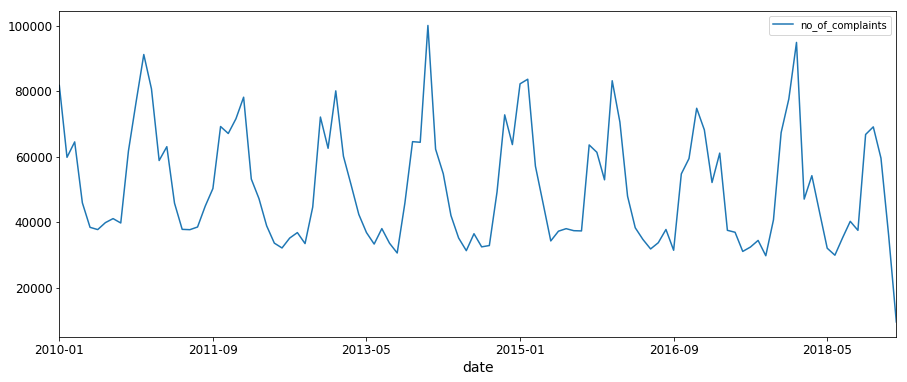

In [17]:
df_complaint_ts.plot(figsize=(15, 6))
plt.show()

In [18]:
df_complaint_ts = df_complaint_ts.reset_index('date')
df_complaint_ts['date'] = pd.to_datetime(df_complaint_ts['date'])
df_complaint_ts = df_complaint_ts.set_index('date')

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_complaint_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [22]:
mod = sm.tsa.statespace.SARIMAX(df_complaint_ts,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4350      0.090     -4.817      0.000      -0.612      -0.258
ma.S.L12      -0.5802      0.098     -5.930      0.000      -0.772      -0.388
sigma2      1.424e+08   1.96e-10   7.27e+17      0.000    1.42e+08    1.42e+08


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


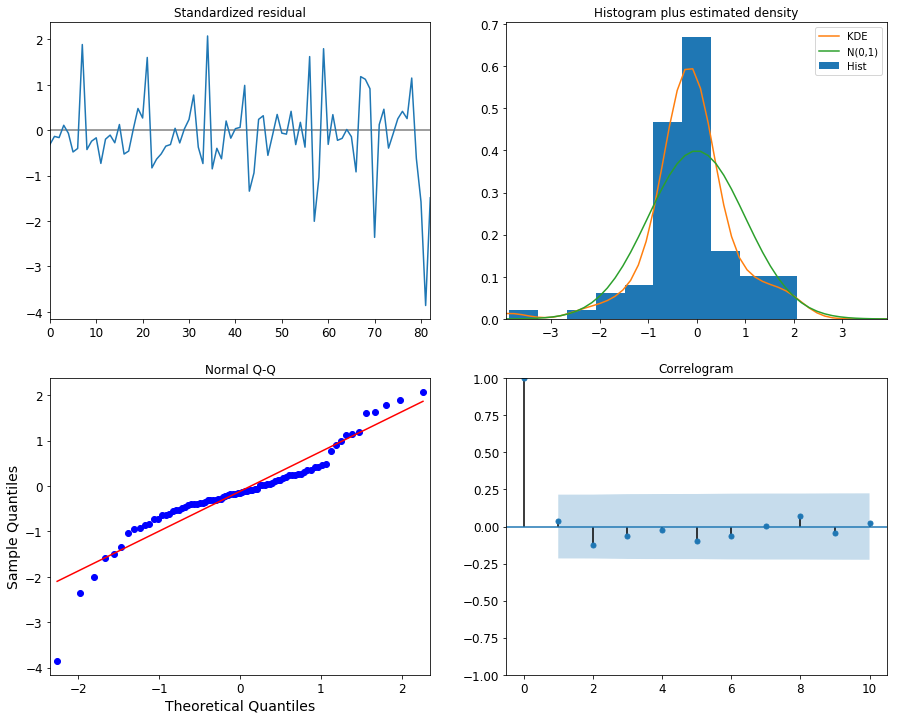

In [23]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2018-01'), dynamic=False)
pred_ci = pred.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

NameError: name 'pred' is not defined

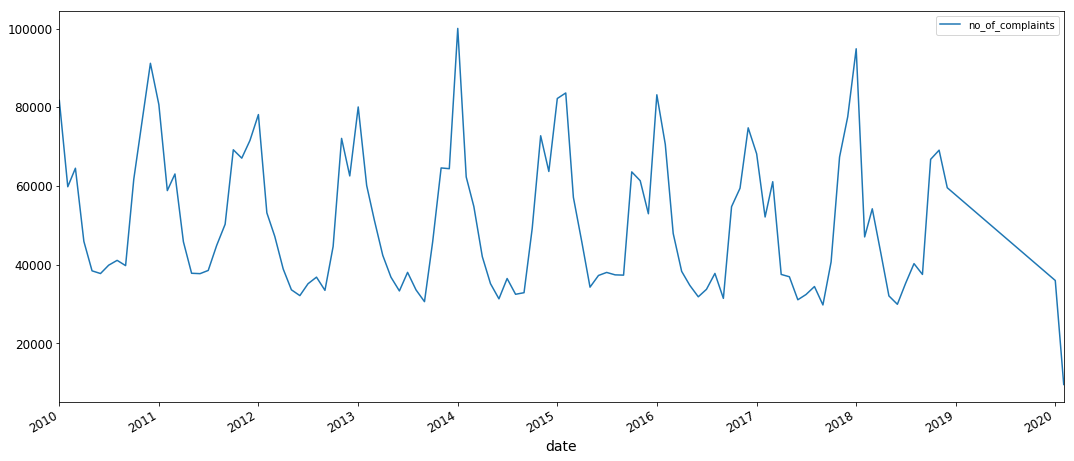

In [25]:
ax = df_complaint_ts['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')
plt.legend()

plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)

y_truth = df_complaint_ts['2018-01':]

# Compute the mean square error
mean_absolute_error = abs((y_forecasted[0] - y_truth['no_of_complaints'] ) ** 1).mean()
print('The Mean Absolute Error of our forecasts is {}'.format(round(mean_absolute_error, 2)))

NameError: name 'pred' is not defined

In [27]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [28]:
ax = df_complaint_ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')

plt.legend()
plt.show()

ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8525908ae8> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range


<font color=red> Concluding Remark:

    <font color=red> The above 'Time Series Forecasting with ARIMA' has potential to predict the future number of complaints. Accuracy of forecast decreases as we try to predict more far into the future as can be seen by increase in the confidence interval. The model has large mean absolute error, so it is not so good and ready to predict the future number of complaints. However, this may help the authorities to better handle the Housing problems and allocate the appropriate resouces after a more careful modelling the problem.
    <font color=red> The are also other models availble to for such problems such as 'Time Series Forecasting with Prophet'. One can try them and compare the results for more accurate predictions and have more confidence in their venture.

